# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities 

https://openweathermap.org/current

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#print(cities)

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    # Create endpoint URL with each city
    # city_url = f'{url}lat={lat_lng[0]}&lon={lat_lng[1]}&appid={weather_api_key}'
    city = city.replace(" ", "+")
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'
    city = city.replace("+", " ")
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | sile
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | nguigmi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | jinchang
Processing Record 10 of Set 1 | leava
Processing Record 11 of Set 1 | concordia
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | ar rutbah
Processing Record 14 of Set 1 | mezhdurechenskiy
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | najran
Processing Record 18 of Set 1 | sweet home
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | korsakov
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | tierra colorada
Processing Record

Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | hadibu
Processing Record 42 of Set 4 | faya-largeau
Processing Record 43 of Set 4 | ulanhot
Processing Record 44 of Set 4 | sanghar
Processing Record 45 of Set 4 | san luis de la loma
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | onguday
Processing Record 48 of Set 4 | san pedro
Processing Record 49 of Set 4 | linkou
Processing Record 0 of Set 5 | agadez
Processing Record 1 of Set 5 | horta
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | afaahiti
Processing Record 5 of Set 5 | bayan nur
City not found. Skipping...
Processing Record 6 of Set 5 | kuytun
Processing Record 7 of Set 5 | alappuzha
Processing Record 8 of Set 5 | shubarshi
Processing Record 9 of Set 5 | voi
Processing Record 10 of Set 5 | kanniyakumari
Processing Record 11 of Set 5 | taltal
Processing Record 12 of Set 5 | buritizeiro
Processing Record 13 of Set 5

Processing Record 32 of Set 8 | mugumu
Processing Record 33 of Set 8 | labuan
Processing Record 34 of Set 8 | rumbek
Processing Record 35 of Set 8 | conduaga
Processing Record 36 of Set 8 | terenozek
Processing Record 37 of Set 8 | carnarvon
Processing Record 38 of Set 8 | khabarovsk
Processing Record 39 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 40 of Set 8 | port alfred
Processing Record 41 of Set 8 | red bluff
Processing Record 42 of Set 8 | nova sintra
Processing Record 43 of Set 8 | muli
Processing Record 44 of Set 8 | crucecita
Processing Record 45 of Set 8 | trairi
Processing Record 46 of Set 8 | toliara
Processing Record 47 of Set 8 | kabansk
Processing Record 48 of Set 8 | sicuani
Processing Record 49 of Set 8 | pangkalan brandan
Processing Record 0 of Set 9 | genhe
Processing Record 1 of Set 9 | copala
Processing Record 2 of Set 9 | erenhot
Processing Record 3 of Set 9 | port augusta
Processing Record 4 of Set 9 | rawson
Processing Record 5 of S

Processing Record 23 of Set 12 | puerto baquerizo moreno
Processing Record 24 of Set 12 | ceerigaabo
Processing Record 25 of Set 12 | mahabe
City not found. Skipping...
Processing Record 26 of Set 12 | valle de la pascua
Processing Record 27 of Set 12 | minas de marcona
Processing Record 28 of Set 12 | mogok
Processing Record 29 of Set 12 | lubao
Processing Record 30 of Set 12 | bratsk
Processing Record 31 of Set 12 | arauquita
Processing Record 32 of Set 12 | karsava
Processing Record 33 of Set 12 | miri
Processing Record 34 of Set 12 | urengoy
Processing Record 35 of Set 12 | teknaf
Processing Record 36 of Set 12 | ilhabela
Processing Record 37 of Set 12 | al bawiti
Processing Record 38 of Set 12 | kurgan
Processing Record 39 of Set 12 | santo domingo
Processing Record 40 of Set 12 | tommot
Processing Record 41 of Set 12 | noosa heads
Processing Record 42 of Set 12 | fannuj
City not found. Skipping...
Processing Record 43 of Set 12 | paradip garh
Processing Record 44 of Set 12 | maym

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701041119
1,guerrero negro,27.9769,-114.0611,21.11,51,22,5.07,MX,1701041119
2,sile,41.1754,29.6133,5.32,53,83,1.79,TR,1701041119
3,kodiak,57.7900,-152.4072,3.73,93,75,2.06,US,1701041119
4,nguigmi,14.2495,13.1092,27.21,27,39,4.93,NE,1701041120


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701041119
1,guerrero negro,27.9769,-114.0611,21.11,51,22,5.07,MX,1701041119
2,sile,41.1754,29.6133,5.32,53,83,1.79,TR,1701041119
3,kodiak,57.7900,-152.4072,3.73,93,75,2.06,US,1701041119
4,nguigmi,14.2495,13.1092,27.21,27,39,4.93,NE,1701041120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

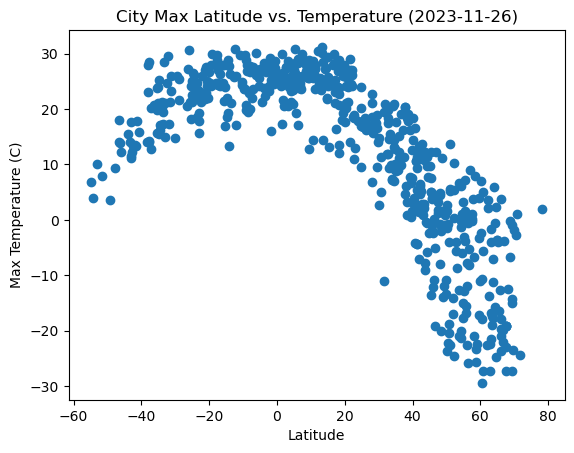

In [72]:
# Build scatter plot for latitude vs. temperature
city_latitudes = [city['Lat'] for city in city_data]
city_temperatures = [city['Max Temp'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(city_latitudes, city_temperatures)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-11-26)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

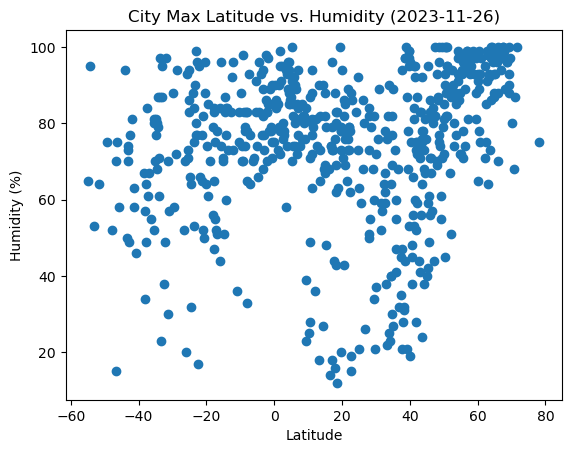

In [73]:
# Build scatter plot for latitude vs. humidity
city_humidity = [city['Humidity'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(city_latitudes, city_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2023-11-26)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

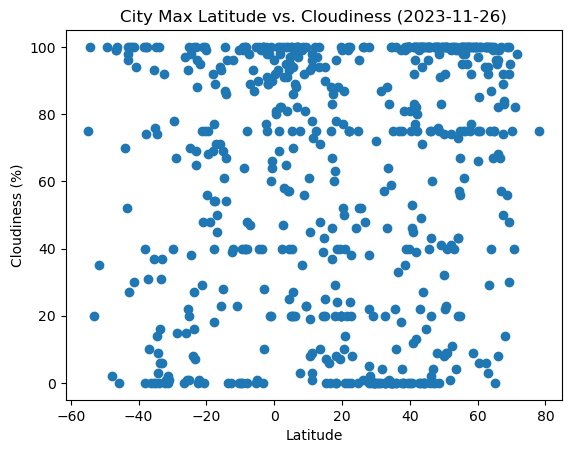

In [61]:
# Build the scatter plots for latitude vs. cloudiness
city_cloudiness = [city['Cloudiness'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(city_latitudes, city_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2023-11-26)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

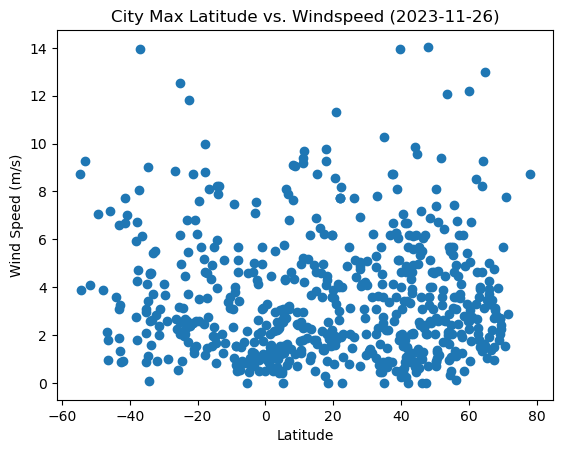

In [62]:
# Build the scatter plots for latitude vs. wind speed
city_cloudiness = [city['Wind Speed'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(city_latitudes, city_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Windspeed (2023-11-26)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.legend()
    plt.show()

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df['Lat'] = city_data_df['Lat'].astype(float)
city_data_df['Lng'] = city_data_df['Lng'].astype(float)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guerrero negro,27.9769,-114.0611,21.11,51,22,5.07,MX,1701041119
2,sile,41.1754,29.6133,5.32,53,83,1.79,TR,1701041119
3,kodiak,57.7900,-152.4072,3.73,93,75,2.06,US,1701041119
4,nguigmi,14.2495,13.1092,27.21,27,39,4.93,NE,1701041120
8,jinchang,38.4953,102.1739,0.92,44,35,2.86,CN,1701041120


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701041119
5,port-aux-francais,-49.3500,70.2167,3.51,75,100,7.04,TF,1701041120
6,papatowai,-46.5619,169.4708,14.07,70,99,2.14,NZ,1701041120
7,port mathurin,-19.6833,63.4167,24.70,74,56,7.61,MU,1701041120
9,leava,-14.3000,-178.1667,28.86,77,86,5.98,WF,1701041121


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7483772692161368


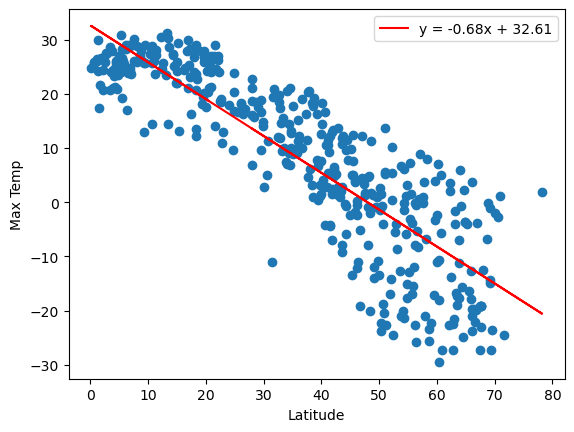

In [83]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], "Latitude","Max Temp")

The r-squared is: 0.45384537805947356


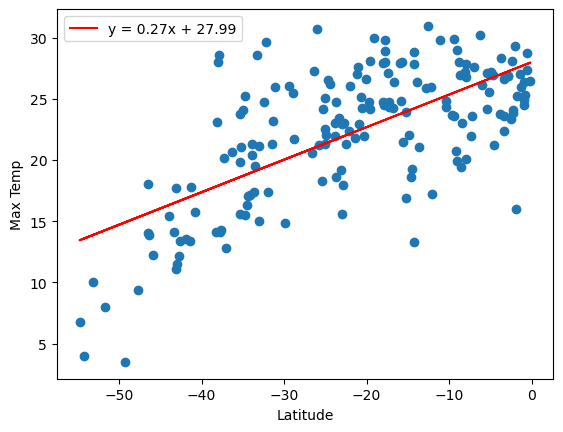

In [85]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], "Latitude","Max Temp")

**Discussion about the linear relationship:** There is a strong correlation to the temperature of a city as it gets closer to the equator. The northern hemisphere has a higher r-squared value of 0.748 vs 0.453 meaning that the correlation is stronger on the northern hemisphere than it is at the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05457992771746187


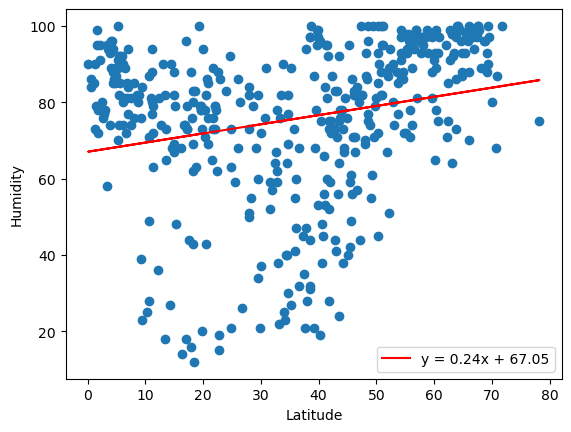

In [86]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], "Latitude","Humidity")

The r-squared is: 0.08650068058542694


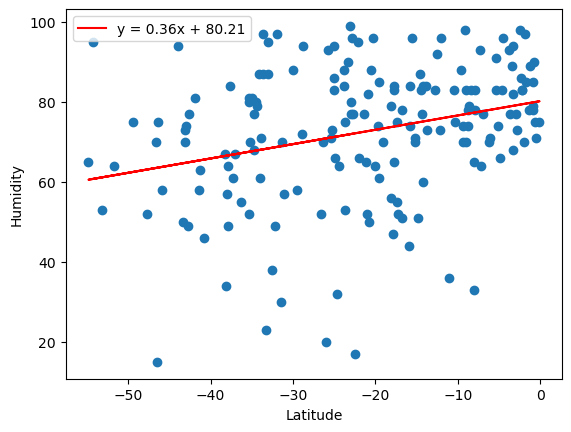

In [87]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], "Latitude","Humidity")

**Discussion about the linear relationship:** There is no correlation to the humidity of a city as it gets closer to the equator. The southern hemisphere has a higher r-squared value of 0.054 vs 0.086 meaning that the correlation is stronger on the southern hemisphere than it is at the northern hemisphere, however the correlation is very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.017817957107233714


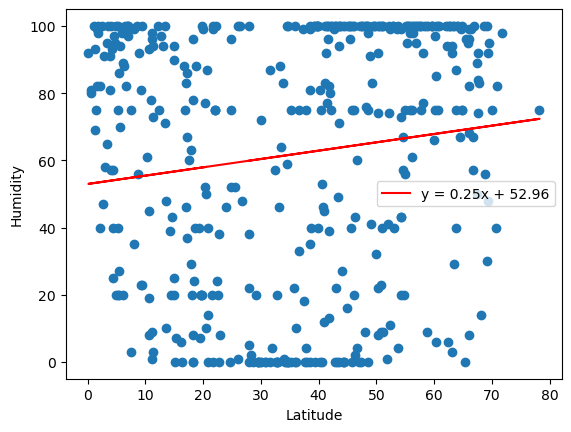

In [88]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], "Latitude","Humidity")

The r-squared is: 0.01176144531187704


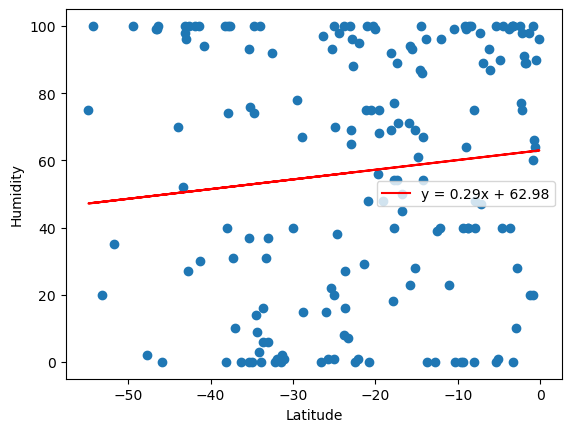

In [89]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], "Latitude","Humidity")

**Discussion about the linear relationship:** There is no correlation to the cloudiness of a city as it gets closer to the equator. The northern hemisphere has a higher r-squared value of 0.017 vs 0.011 meaning that the correlation is stronger on the northern hemisphere than it is at the southern hemisphere, however the correlation is very weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005118042504658593


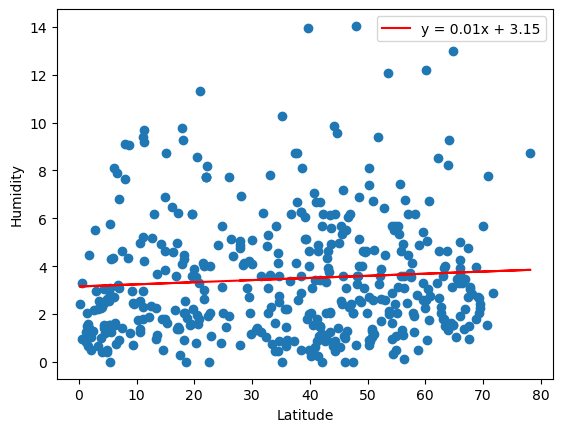

In [92]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], "Latitude","Humidity")

The r-squared is: 0.05026817892359211


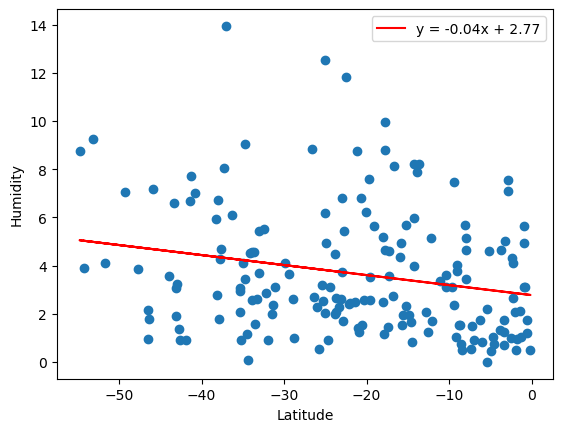

In [93]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], "Latitude","Humidity")

**Discussion about the linear relationship:** There is no correlation to the Wind Speed of a city as it gets closer to the equator. The northern hemisphere has a higher r-squared value of 0.005 vs 0.011 meaning that the correlation is stronger on the northern hemisphere than it is at the southern hemisphere, however the correlation is very weak.